In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import random

from scipy.stats import linregress

In [2]:
#Kaggle cmd will download zip to current file directory -kaggle.json in User folder .kaggle folder
!kaggle datasets download -d zynicide/wine-reviews --force -p ../Resources


  0%|          | 0.00/50.9M [00:00<?, ?B/s]
  2%|1         | 1.00M/50.9M [00:00<00:20, 2.59MB/s]
  4%|3         | 2.00M/50.9M [00:00<00:16, 3.20MB/s]
  6%|5         | 3.00M/50.9M [00:00<00:16, 3.05MB/s]
  8%|7         | 4.00M/50.9M [00:01<00:16, 2.93MB/s]
 10%|9         | 5.00M/50.9M [00:01<00:15, 3.13MB/s]
 12%|#1        | 6.00M/50.9M [00:01<00:13, 3.44MB/s]
 14%|#3        | 7.00M/50.9M [00:02<00:12, 3.56MB/s]
 16%|#5        | 8.00M/50.9M [00:02<00:11, 3.81MB/s]
 18%|#7        | 9.00M/50.9M [00:02<00:10, 4.06MB/s]
 20%|#9        | 10.0M/50.9M [00:02<00:10, 4.28MB/s]
 22%|##1       | 11.0M/50.9M [00:02<00:09, 4.64MB/s]
 24%|##3       | 12.0M/50.9M [00:03<00:08, 4.77MB/s]
 26%|##5       | 13.0M/50.9M [00:03<00:07, 5.45MB/s]
 28%|##7       | 14.0M/50.9M [00:03<00:06, 5.63MB/s]
 29%|##9       | 15.0M/50.9M [00:03<00:06, 5.75MB/s]
 31%|###1      | 16.0M/50.9M [00:03<00:06, 5.56MB/s]
 33%|###3      | 17.0M/50.9M [00:04<00:07, 4.94MB/s]
 35%|###5      | 18.0M/50.9M [00:04<00:07, 4.74MB/s]
 

In [3]:
# Unzip Kaggle Data
import zipfile

Dataset = "wine-reviews"

# Will unzip the files so that you can see them..
with zipfile.ZipFile(f"../Resources/{Dataset}.zip","r") as z:
    z.extractall("../Resources")

In [4]:
# Reading csv and cleaning column names
df = pd.read_csv('../Resources/winemag-data-130k-v2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
# pandas drop a column with drop function
df.drop(['taster_twitter_handle','taster_name'], axis=1, inplace=True)

In [6]:
country = df['country'].value_counts()
country1 = country.iloc[0:4]

In [7]:
price = df['price'].value_counts()
price1 = price.iloc[0:4]

In [8]:
region = df['region_1'].value_counts()
region1 = region.iloc[0:4]

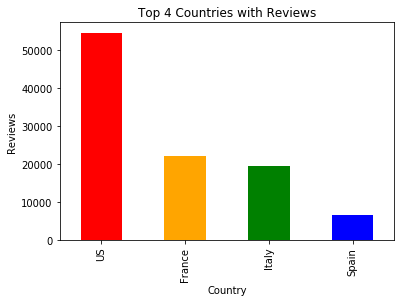

In [9]:
country1.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])

# Give our chart some labels and a tile
plt.title("Top 4 Countries with Reviews")
plt.xlabel("Country")
plt.ylabel("Reviews")
plt.savefig(f"../Analysis/png_output/wine_base_on_countries")
plt.show()

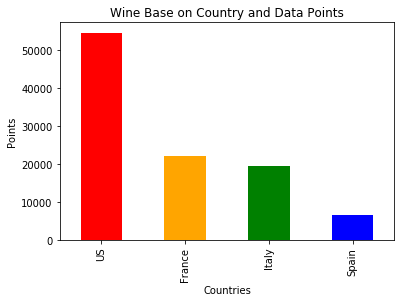

In [10]:
price1.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
country1.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])

# Give our chart some labels and a tile
plt.title("Wine Base on Country and Data Points")
plt.xlabel("Countries")
plt.ylabel("Points")
plt.savefig(f"../Analysis/png_output/country_vs_price")
plt.show()

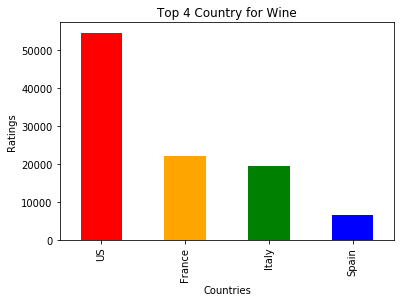

In [11]:
region1.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
country1.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])

# Give our chart some labels and a tile
plt.title("Top 4 Country for Wine")
plt.xlabel("Countries")
plt.ylabel("Ratings")
plt.savefig(f"../Analysis/png_output/country_vs_regions")
plt.show()

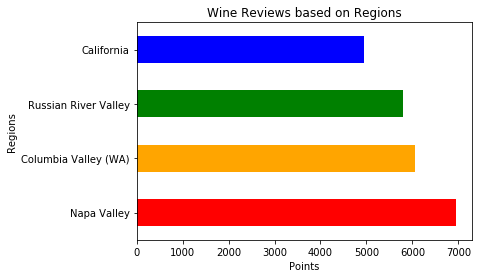

In [12]:
price1.plot(kind ='barh', color=['red', 'orange', 'green', 'blue'])
region1.plot(kind = 'barh', color=['red', 'orange', 'green', 'blue'])

# Give our chart some labels and a tile
plt.title("Wine Reviews based on Regions")
plt.xlabel("Points")
plt.ylabel("Regions")
plt.savefig(f"../Analysis/png_output/Price_regions")
plt.show()

In [13]:
# The maximum x value for our chart will be 50000
x_limit = 50000

# List of values from 0 to 50000 each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]

In [14]:
# Group by Country and Different regions

grouped_df = df.groupby(['country'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head()

,description,designation,points,price,province,region_1,region_2,title,variety,winery
country,,,,,,,,,,
Argentina,3800,2902,3800,3756,3800,3747,0,3800,3800,3800
Armenia,2,2,2,2,2,0,0,2,2,2
Australia,2329,1640,2329,2294,2329,2327,0,2329,2329,2329
Austria,3345,2825,3345,2799,3345,0,0,3345,3345,3345
Bosnia and Herzegovina,2,1,2,2,2,0,0,2,2,2


In [15]:
grouped_df = df.groupby(['region_1'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head()

,country,description,designation,points,price,province,region_2,title,variety,winery
region_1,,,,,,,,,,
Abruzzo,6,6,5,6,6,6,0,6,6,6
Adelaida District,110,110,91,110,110,110,110,110,110,110
Adelaide,16,16,15,16,16,16,0,16,16,16
Adelaide Hills,107,107,66,107,105,107,0,107,107,107
Adelaide Plains,4,4,0,4,4,4,0,4,4,4


In [16]:
grouped_df = df.groupby(['region_2'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_df)

# In order to be visualized, a data function must be used...
grouped_df.count().head()

,country,description,designation,points,price,province,region_1,title,variety,winery
region_2,,,,,,,,,,
California Other,2663,2663,1261,2663,2661,2663,2663,2663,2663,2663
Central Coast,11065,11065,7902,11065,10975,11065,11065,11065,11065,11065
Central Valley,1062,1062,678,1062,1058,1062,1062,1062,1062,1062
Columbia Valley,8103,8103,5572,8103,8058,8103,8103,8103,8103,8103
Finger Lakes,1777,1777,1232,1777,1768,1777,1777,1777,1777,1777


In [17]:
group_country = pd.DataFrame(df.groupby('country')['region_1'].count())
group_country.sort_values(by='region_1', ascending=False)
group_country.head()

,region_1
country,
Argentina,3747
Armenia,0
Australia,2327
Austria,0
Bosnia and Herzegovina,0


In [18]:
# Labels for the sections of our pie chart
labels = ["US", "France", "Italy", "Spain"]

# The values of each section of the pie chart
sizes = [54226, 22017, 19513, 6637]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "Yellow", "Purple","Green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

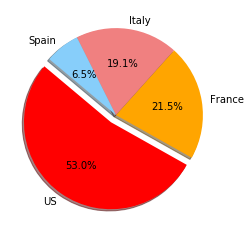

In [19]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig(f"../Analysis/png_output/piechartcountries")
plt.show()

In [20]:
group_country = pd.DataFrame(df.groupby('country')['price'].count())
group_country.sort_values(by='price', ascending=False)

,price
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4416
Argentina,3756
Austria,2799
Australia,2294


In [21]:
# Labels for the sections of our pie chart
labels = ["US", "France", "Italy", "Spain", "Portugal"]

# The values of each section of the pie chart
sizes = [54265, 17776, 16917, 6573, 4875]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "Yellow", "Purple","Green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0, 0)

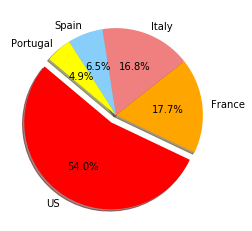

In [22]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig(f"../Analysis/png_output/topwinecountries")
plt.show()

In [23]:
df_price = df.groupby('price').count()
df_price[df_price['country'] > 100]

,country,description,designation,points,province,region_1,region_2,title,variety,winery
price,,,,,,,,,,
6.0,118,120,64,120,118,71,24,120,120,120
7.0,433,433,266,433,433,235,111,433,433,433
8.0,892,892,531,892,892,550,246,892,892,892
9.0,1339,1339,812,1339,1339,806,220,1339,1339,1339
10.0,3439,3439,2077,3439,3439,2331,803,3439,3439,3439
...,...,...,...,...,...,...,...,...,...,...
125.0,328,328,276,328,328,314,221,328,328,328
130.0,141,141,112,141,141,136,29,141,141,141
135.0,110,110,99,110,110,109,64,110,110,110


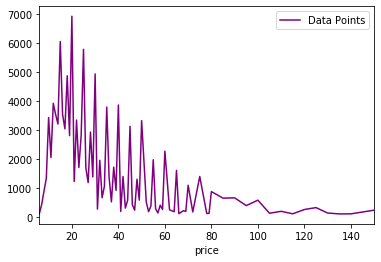

In [24]:
df_price = df.groupby('price').count()
df_price_only = pd.DataFrame(df_price[df_price['country'] > 100] ['country']).rename(columns={'country':'Data Points'})
df_price_only.plot(kind = 'line', color=['purple'])
plt.savefig(f"../Analysis/png_output/regionpricedatapoints")
plt.show()

In [25]:
group_country = pd.DataFrame(df.groupby('country')['region_1'].count())
group_country.sort_values(by='region_1', ascending=False)

,region_1
country,
US,54226
France,22017
Italy,19513
Spain,6637
Argentina,3747
Australia,2327
Canada,257
Turkey,0
Macedonia,0


In [26]:
group_countryv = pd.DataFrame(df.groupby('country')['variety'].count())
group_countryv.sort_values(by='variety', ascending=False)

,variety
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4471
Argentina,3800
Austria,3345
Australia,2329


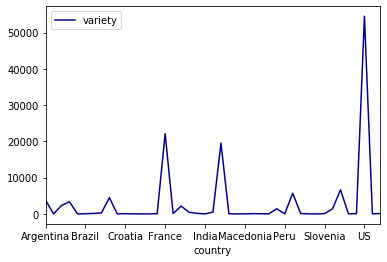

In [27]:
group_countryv.plot(kind = 'line', color=['darkblue'])
plt.savefig(f"../Analysis/png_output/variety")
plt.show()

In [28]:
grouped_df.count().head()

,country,description,designation,points,price,province,region_1,title,variety,winery
region_2,,,,,,,,,,
California Other,2663,2663,1261,2663,2661,2663,2663,2663,2663,2663
Central Coast,11065,11065,7902,11065,10975,11065,11065,11065,11065,11065
Central Valley,1062,1062,678,1062,1058,1062,1062,1062,1062,1062
Columbia Valley,8103,8103,5572,8103,8058,8103,8103,8103,8103,8103
Finger Lakes,1777,1777,1232,1777,1768,1777,1777,1777,1777,1777


In [29]:
group_region = pd.DataFrame(df.groupby('region_2')['points'].count())
group_region.sort_values(by='points', ascending=False)

,points
region_2,
Central Coast,11065
Sonoma,9028
Columbia Valley,8103
Napa,6814
Willamette Valley,3423
California Other,2663
Finger Lakes,1777
Sierra Foothills,1462
Napa-Sonoma,1169


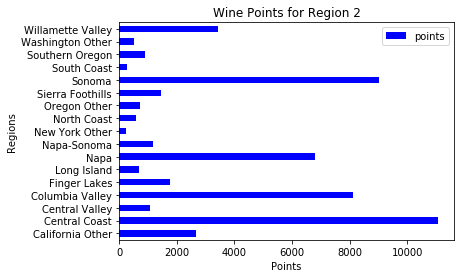

In [30]:
group_region.plot(kind ='barh', color=['blue'])

# Give our chart some labels and a tile
plt.title("Wine Points for Region 2")
plt.xlabel("Points")
plt.ylabel("Regions")
plt.savefig(f"../Analysis/png_output/winepointsregion2")
plt.show()

In [31]:
grouped_df.count().head()

,country,description,designation,points,price,province,region_1,title,variety,winery
region_2,,,,,,,,,,
California Other,2663,2663,1261,2663,2661,2663,2663,2663,2663,2663
Central Coast,11065,11065,7902,11065,10975,11065,11065,11065,11065,11065
Central Valley,1062,1062,678,1062,1058,1062,1062,1062,1062,1062
Columbia Valley,8103,8103,5572,8103,8058,8103,8103,8103,8103,8103
Finger Lakes,1777,1777,1232,1777,1768,1777,1777,1777,1777,1777


In [32]:
# Sort by each province to find the output
province = df['province'].value_counts()
province = province.iloc[0:5]

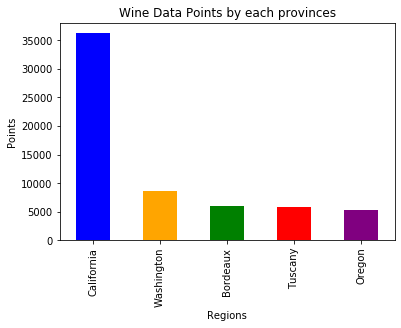

In [33]:
# Chart provinces by wine data set
province.plot(kind ='bar', color=['blue', 'orange', 'green', 'red', 'purple'])

# Give our chart some labels and a tile
plt.title("Wine Data Points by each provinces")
plt.xlabel("Regions")
plt.ylabel("Points")
plt.savefig(f"../Analysis/png_output/eachprovinces")
plt.show()

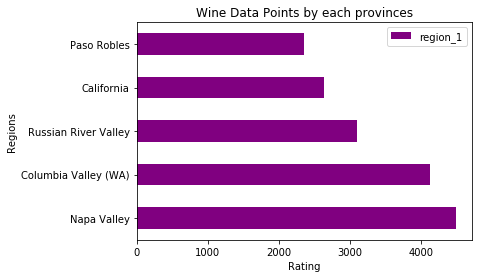

In [34]:
df['region_1'].value_counts().to_frame().head(5).plot(kind='barh', color=['purple'])
plt.xlabel('Rating')
plt.ylabel('Regions')
plt.title("Wine Data Points by each provinces")
plt.savefig(f"../Analysis/png_output/winepointprovinces")
plt.show()

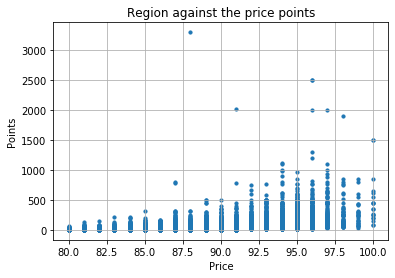

In [35]:
# Build a scatter plot for each data type
plt.scatter(df["points"], df["price"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("Region against the price points")
plt.ylabel("Points")
plt.xlabel("Price")
plt.grid(True)

# Save the figure
plt.savefig(f"../Analysis/png_output/provinceratingprice")

# Show plot
plt.show()

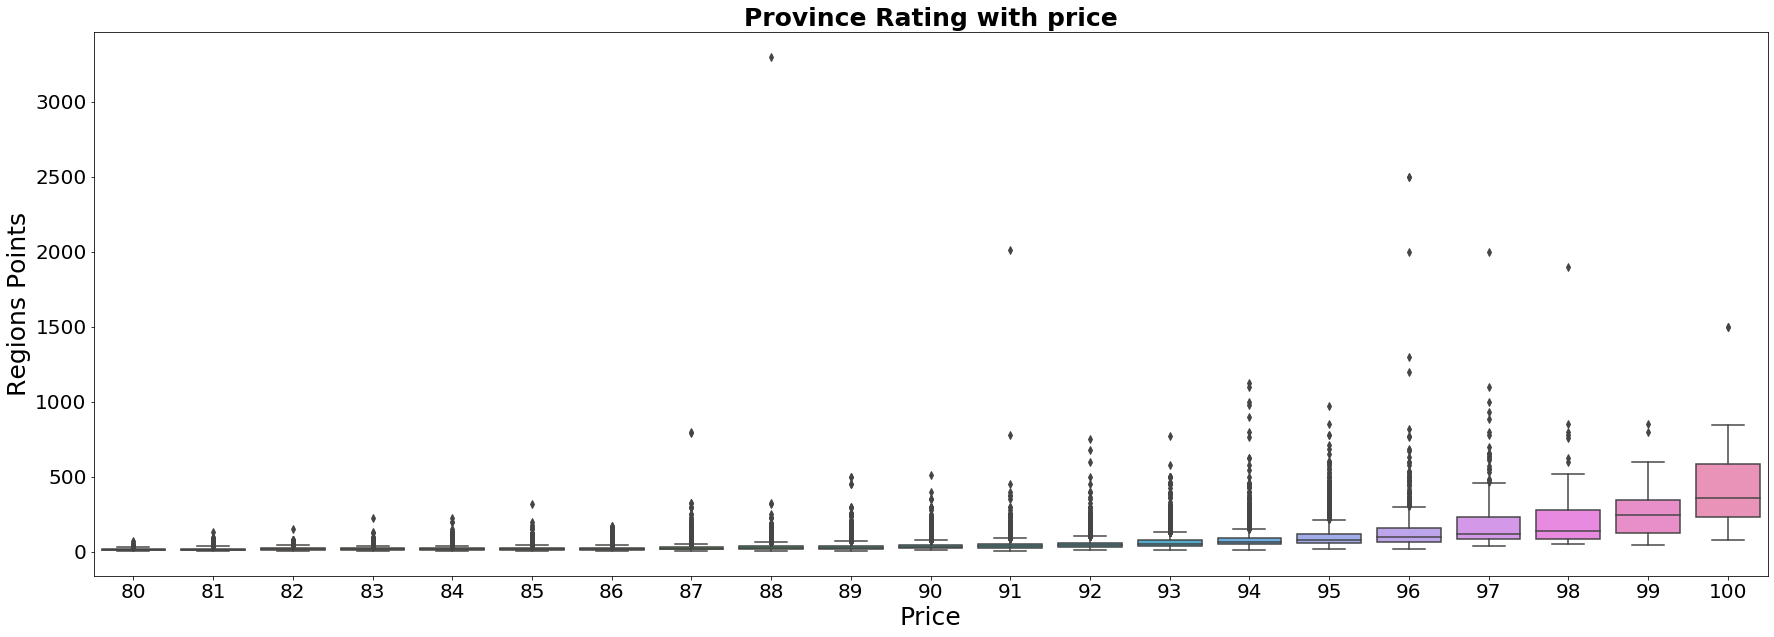

In [36]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(x='points', y='price', data=df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set_title('Province Rating with price', fontweight="bold", size=25) # Title
ax.set_ylabel('Regions Points', fontsize = 25) # Y label
ax.set_xlabel('Price', fontsize = 25) # X label

# Save the figure
plt.savefig(f"../Analysis/png_output/boxplot")

plt.show()